In [2]:
import pandas as pd

nyoba = pd.read_excel("adaKami-reviews.xlsx")

nyoba

,Unnamed: 0,date,review,rating,isEdited,userName,title
0,0,2020-08-31 01:32:47,"Udah bunga gede, belom jatuh tempo udah dikata...",1,False,dodol !!,Jangan pinjam di sini. Mending gadai barang. S...
1,1,2020-02-07 07:52:55,Jatuh tempo tgl 26 belum ada telat sama sekali...,1,False,bruno-dos,Belum jatuh tempo
2,2,2022-08-06 06:31:01,Penyebaran Data Pribadi seperti Informasi Elek...,1,False,dewi nur atikah,Jangan Pinjem disini 馃槉
3,3,2020-02-28 14:30:26,Baru juga daftar pas minta naikin limit melalu...,1,False,tiarsyifa,Sebar data ya ?
4,4,2021-06-05 05:39:20,sudah tidak lagi pake aplikasi ini.. barusan s...,1,False,Ayiie8,馃槫
...,...,...,...,...,...,...,...
1995,1995,2022-08-09 09:59:45,"Udah pencairannya agak lama, bunganya gede, de...",1,False,ahskajsvakakshsks,"JANGAN PINJAM DISINI, BAKAL NYESEL"
1996,1996,2022-08-09 08:43:53,Nama saya Regina tolong DATA-DATA saya di hapu...,1,False,pecinta mactha,Pecinta matcha
1997,1997,2022-08-09 07:19:31,Aplikasi tolol udah capek capek daftar nge ver...,1,False,farhadtullah,TOLOL
1998,1998,2022-08-09 06:39:46,kntl,1,False,lalunatama,kntl


In [3]:
data_pilih=nyoba[['review', 'userName', 'title']]
data_pilih

,review,userName,title
0,"Udah bunga gede, belom jatuh tempo udah dikata...",dodol !!,Jangan pinjam di sini. Mending gadai barang. S...
1,Jatuh tempo tgl 26 belum ada telat sama sekali...,bruno-dos,Belum jatuh tempo
2,Penyebaran Data Pribadi seperti Informasi Elek...,dewi nur atikah,Jangan Pinjem disini 馃槉
3,Baru juga daftar pas minta naikin limit melalu...,tiarsyifa,Sebar data ya ?
4,sudah tidak lagi pake aplikasi ini.. barusan s...,Ayiie8,馃槫
...,...,...,...
1995,"Udah pencairannya agak lama, bunganya gede, de...",ahskajsvakakshsks,"JANGAN PINJAM DISINI, BAKAL NYESEL"
1996,Nama saya Regina tolong DATA-DATA saya di hapu...,pecinta mactha,Pecinta matcha
1997,Aplikasi tolol udah capek capek daftar nge ver...,farhadtullah,TOLOL
1998,kntl,lalunatama,kntl


In [4]:
from nltk import sent_tokenize 
from nltk import word_tokenize 
from nltk.corpus import stopwords
import regex as re

def preprocess(doc): 
    doc = re.sub(r'http\S+|www\S+|t\.co\S+', '', doc)

    sents = word_tokenize(doc)
    sents_tok = list() 

    for s in sents:
        s = s.strip().lower() # case folding dan menghilangkan new line 
        s = s.replace("\n", " ") # menggantikan \n dengan spasi 
        s = re.sub(r'[^a-zA-Z0-9 ]', ' ', s) # menghapus simbol 
        s = re.sub(' +', ' ', s) # menghapus repetitive space 
        s = re.sub(r'[0-9]+', '', s)  # Menghapus angka 
        sents_tok.append(s)

    return " ".join(sents_tok)

docs_clear = list() 
for d in data_pilih["review"]: 
    docs_clear.append(preprocess(d))

docs_clear


['udah bunga gede   belom jatuh tempo udah dikatain ga mao bayar   bkin sakit hati   pas mao bayar dipersulit   mungkin biar dapet bunga riba tambahan kali ya   taik lah   edit   bgsd       mau bayar pas jatoh tempo gagal terus   pas cek mutasi kena biaya admin transfer antar bank sampe x       yang review bintang  bot semua   aplikasi sialan  ',
 'jatuh tempo tgl  belum ada telat sama sekali tapi sudah ada penagihan melalui sms yang menurut saya kurang sopan   pengancaman   serta bahasa yang kurang pantas  ',
 'penyebaran data pribadi seperti informasi elektronik dan dokumen elektronik   serta berisi ancaman tindakan kekerasan dan kata kata kasar maupun kotor   tindakan ini dapat dilaporkan ke pihak polisi karena sudah melanggar aturan yang berupa sanksi diatur dalam pasal  ayat      uu ite   pengancaman perusahaan pinjaman online terhadap anda melalui media elektronik dapat dijerat dengan pasal  jo pasal b uu ite   pelaku pengancaman dapat diproses pidana  ',
 'baru juga daftar pas m

In [5]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize
factory = StopWordRemoverFactory()
stopword = factory.create_stop_word_remover()

stop_docs = []

for doc in docs_clear:
    cleaned_doc = stopword.remove(doc)
    stop_docs.append(cleaned_doc)

stop_docs

['udah bunga gede   belom jatuh tempo udah dikatain ga mao bayar   bkin sakit hati   pas mao bayar dipersulit   mungkin biar dapet bunga riba tambahan kali   taik lah   edit   bgsd       mau bayar pas jatoh tempo gagal terus   pas cek mutasi kena biaya admin transfer antar bank sampe x       review bintang  bot semua   aplikasi sialan  ',
 'jatuh tempo tgl  telat sama sekali sudah ada penagihan melalui sms menurut kurang sopan   pengancaman   bahasa kurang pantas  ',
 'penyebaran data pribadi informasi elektronik dokumen elektronik   berisi ancaman tindakan kekerasan kata kata kasar maupun kotor   tindakan dilaporkan pihak polisi sudah melanggar aturan berupa sanksi diatur pasal  ayat      uu ite   pengancaman perusahaan pinjaman online anda melalui media elektronik dijerat pasal  jo pasal b uu ite   pelaku pengancaman dapat diproses pidana  ',
 'baru daftar pas minta naikin limit melalui aplikasi gojek malah aplikasi sayanya keluar sendiri   abis ada nomor telepon engga jelas masuk an

In [6]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()

stemmed_docs = []

for doc in stop_docs:
    stemmed_doc = stemmer.stem(doc)
    stemmed_docs.append(stemmed_doc)

In [7]:
stemmed_docs

['udah bunga gede bom jatuh tempo udah dikatain ga mao bayar bkin sakit hati pas mao bayar sulit mungkin biar dapet bunga riba tambah kali taik lah edit bgsd mau bayar pas jatoh tempo gagal terus pas cek mutasi kena biaya admin transfer antar bank sampe x review bintang bot semua aplikasi sial',
 'jatuh tempo tgl telat sama sekali sudah ada tagih lalu sms turut kurang sopan ancam bahasa kurang pantas',
 'sebar data pribadi informasi elektronik dokumen elektronik isi ancam tindak keras kata kata kasar maupun kotor tindak lapor pihak polisi sudah langgar atur upa sanksi atur pasal ayat uu ite ancam usaha pinjam online anda lalu media elektronik jerat pasal jo pasal b uu ite laku ancam dapat proses pidana',
 'baru daftar pas minta naikin limit lalu aplikasi gojek malah aplikasi saya keluar sendiri abis ada nomor telepon engga jelas masuk angkat malah mati ya kalau mau niat pinjemin engga sebar data',
 'pake aplikasi barusan umur umur pake aplikasi pinjam online kayak gin pernah sekali lew

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import cluster

tfidf_vectorizer = TfidfVectorizer(max_df=0.50, min_df = 2)
X = tfidf_vectorizer.fit_transform(stemmed_docs)
print(X)

  (0, 1549)	0.15528741061882145
  (0, 102)	0.06009388657149939
  (0, 1523)	0.09133328302527245
  (0, 297)	0.1513737873369462
  (0, 257)	0.11757600800070796
  (0, 1432)	0.1464444967280191
  (0, 1462)	0.10558360858991205
  (0, 181)	0.13768958395567957
  (0, 91)	0.1904830639451052
  (0, 1759)	0.16558147931095035
  (0, 16)	0.12811072586198102
  (0, 248)	0.10558360858991205
  (0, 844)	0.13288505181528348
  (0, 1121)	0.17751407116226892
  (0, 345)	0.1513737873369462
  (0, 1706)	0.0949925973635416
  (0, 555)	0.1398986546594626
  (0, 741)	0.14962217580699816
  (0, 1051)	0.07083998436637909
  (0, 505)	0.1831793059740922
  (0, 932)	0.11528722515214161
  (0, 1645)	0.1574964813226045
  (0, 790)	0.09747147185258187
  (0, 1649)	0.13565743589998158
  (0, 1433)	0.1398986546594626
  :	:
  (1996, 1341)	0.08271856694796903
  (1996, 1336)	0.14628380074055
  (1996, 949)	0.1411175889537348
  (1996, 395)	0.3037420357295095
  (1996, 1491)	0.1323813495328154
  (1997, 864)	0.2641550557896915
  (1997, 1823)	0.21

In [9]:
from gensim.models import Word2Vec
import numpy as np

model = Word2Vec(sentences=stemmed_docs, vector_size=200, window=5, min_count=2, workers=4)

def document_vector(doc):
    doc = [word for word in doc if word in model.wv]
    return np.mean(model.wv[doc], axis=0) if doc else np.zeros(model.vector_size)


X2 = np.array([document_vector(doc) for doc in stemmed_docs])

print(X2.shape) 


(2000, 200)


In [10]:
k = 3
seed= 99
km = cluster.KMeans(n_clusters=k, init='random', random_state=seed)
km.fit(X)

C_km= km.predict(X)
C_km

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 1, 1])

In [11]:
k = 3
seed= 99
km = cluster.KMeans(n_clusters=k, init='random', random_state=seed)
km.fit(X2)

C_km= km.predict(X2)
C_km

c:\Users\ACER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, ..., 0, 2, 1])

In [12]:
from sklearn.metrics import silhouette_score as siluet
C = [C_km]

for res in C:
    print(siluet(X2, res))

0.3152284021685656


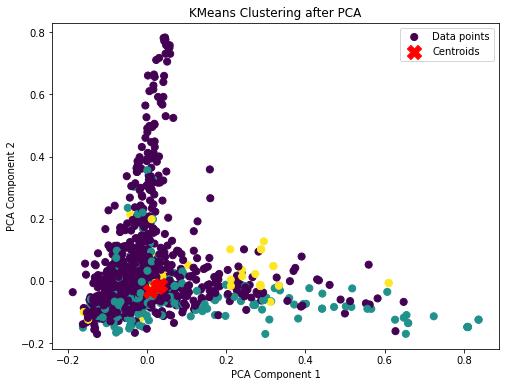

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

X_dense = X.toarray()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=C_km, s=50, cmap='viridis', label='Data points')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering after PCA')
plt.legend()
plt.show()


In [14]:
from sklearn.cluster import MeanShift
from sklearn.metrics import silhouette_score

mean_shift = MeanShift()
C_ms = mean_shift.fit_predict(X2)

sil_score_ms = silhouette_score(X2, C_ms)

print("Cluster assignment (Mean Shift):", C_ms)
print("Silhouette Score (Mean Shift):", sil_score_ms)

Cluster assignment (Mean Shift): [ 0  0  0 ...  0 11 34]
Silhouette Score (Mean Shift): 0.2932324892093031


In [15]:
import numpy as np
import skfuzzy as fuzz
from sklearn.metrics import silhouette_score

cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(X2.T, c=3, m=2, error=0.005, maxiter=1000, init=None)
C_fcm = np.argmax(u, axis=0)

sil_score_fcm = silhouette_score(X2, C_fcm)

print("Cluster assignment (Fuzzy C-Means):", C_fcm)
print("Silhouette Score (Fuzzy C-Means):", sil_score_fcm)


Cluster assignment (Fuzzy C-Means): [0 0 0 ... 0 0 1]
Silhouette Score (Fuzzy C-Means): 0.06575387475656555
